In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras import optimizers
import tensorflow as tf
from keras.datasets import cifar10

# NumPy
import numpy as np

# Python Std Lib
import os

# User Lib
dropout = 0.2

# get the training and test data
(input_train, output_train), (input_test, output_test) = cifar10.load_data()

# creating the basic model
model = Sequential()

# 30 Conv Layer
model.add(Conv2D(30, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
# 15 Max Pool Layer
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Dropout(dropout))
# 13 Conv Layer
model.add(Conv2D(13, kernel_size=(3,3), padding='valid', activation='relu'))
# 6 Max Pool Layer
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Dropout(dropout))
# Flatten the Layer for transitioning to the Fully Connected Layers
model.add(Flatten())
# 120 Fully Connected Layer
model.add(Dense(120, activation='relu'))
# 84 Fully Connected Layer
model.add(Dense(86, activation='relu'))
# 10 Output
model.add(Dense(10, activation='softmax'))

# compile the model
initial_learning_rate = 0.001
sgd = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

def scheduler(epoch, lr):
  if epoch < 100:
    return 0.02
  elif epoch < 200:
    return 0.01
  elif epoch < 400:
    return 0.005
  elif epoch < 700:
    return 0.003
  else: 
    return 0.001    

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)



model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
save_dir = '/content/drive/MyDrive/ECE6930/Lenet-0222-01/changelr/2dropout/1'
checkpointer = keras.callbacks.ModelCheckpoint(os.path.join(save_dir, '{epoch:03d}.h5'), monitor='val_loss', verbose=0,						save_best_only=False, 
 								save_weights_only=False, mode='auto', 
 								period=10)


# train the model
history = model.fit(input_train/255, to_categorical(output_train), epochs=1000, 
           validation_data=(input_test/255, to_categorical(output_test)),
                    batch_size=128,callbacks=[callback,checkpointer])


# test
score = model.evaluate(input_test/255, to_categorical(output_test), batch_size=128)

# print test set results
print("Testset Loss: %f" % score[0])
print("Testset Accuracy: %f" % score[1])



Epoch 1/1000
391/391 [==============================] - 4s 8ms/step - loss: 2.2568 - accuracy: 0.1489 - val_loss: 2.1263 - val_accuracy: 0.2032 - lr: 0.0200
Epoch 2/1000
391/391 [==============================] - 3s 8ms/step - loss: 2.0187 - accuracy: 0.2611 - val_loss: 1.9233 - val_accuracy: 0.3099 - lr: 0.0200
Epoch 3/1000
391/391 [==============================] - 3s 7ms/step - loss: 1.8822 - accuracy: 0.3155 - val_loss: 1.8584 - val_accuracy: 0.3295 - lr: 0.0200
Epoch 4/1000
391/391 [==============================] - 2s 6ms/step - loss: 1.7742 - accuracy: 0.3569 - val_loss: 1.6522 - val_accuracy: 0.4134 - lr: 0.0200
Epoch 5/1000
391/391 [==============================] - 2s 6ms/step - loss: 1.6855 - accuracy: 0.3880 - val_loss: 1.6151 - val_accuracy: 0.4177 - lr: 0.0200
Epoch 6/1000
391/391 [==============================] - 2s 6ms/step - loss: 1.6124 - accuracy: 0.4129 - val_loss: 1.5183 - val_accuracy: 0.4441 - lr: 0.0200
Epoch 7/1000
391/391 [==============================] - 3s

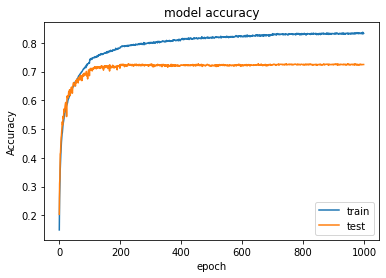

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()


In [ ]:
print(history.history)

{'loss': [2.2568275928497314, 2.0187478065490723, 1.8821609020233154, 1.7741612195968628, 1.6855067014694214, 1.612359881401062, 1.5579721927642822, 1.5130057334899902, 1.472480058670044, 1.4384562969207764, 1.4155408143997192, 1.3919692039489746, 1.3627246618270874, 1.3418868780136108, 1.3255743980407715, 1.3077983856201172, 1.2887122631072998, 1.274728775024414, 1.2535940408706665, 1.2386972904205322, 1.2273558378219604, 1.213835597038269, 1.199421763420105, 1.1910488605499268, 1.1778266429901123, 1.170521855354309, 1.1575671434402466, 1.1467872858047485, 1.136304259300232, 1.1273730993270874, 1.1217951774597168, 1.1135224103927612, 1.101225733757019, 1.0929956436157227, 1.0909584760665894, 1.0788575410842896, 1.0683594942092896, 1.0642516613006592, 1.0581707954406738, 1.0459805727005005, 1.0433465242385864, 1.0332286357879639, 1.0298786163330078, 1.0205284357070923, 1.0143532752990723, 1.00676691532135, 1.0032908916473389, 0.9955878257751465, 0.9938363432884216, 0.9796774387359619, 